<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

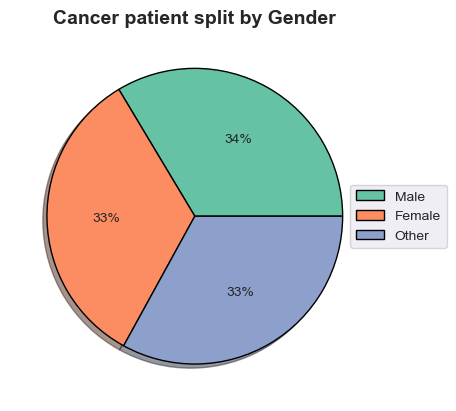

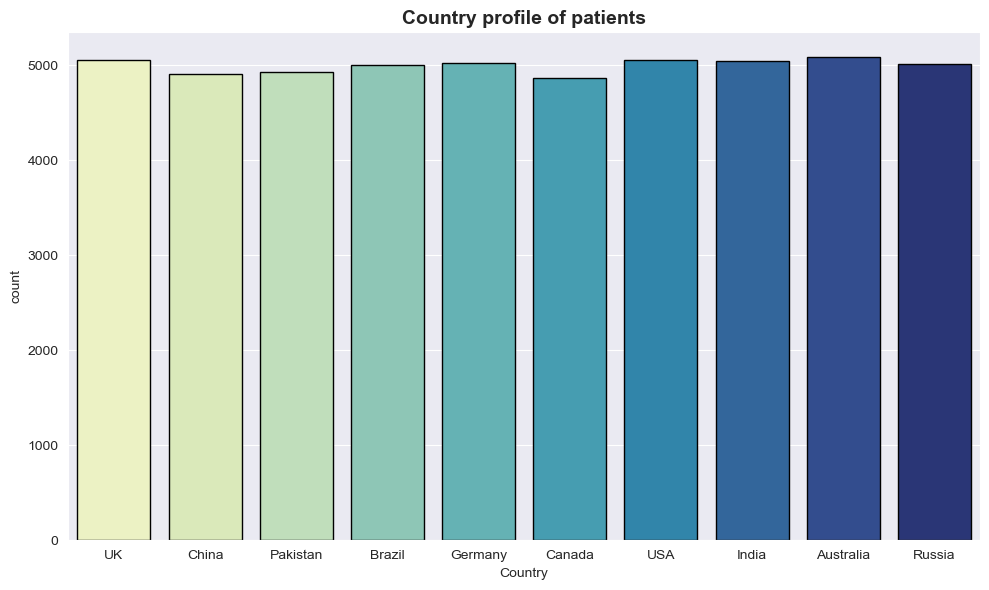

CPU times: total: 422 ms
Wall time: 420 ms


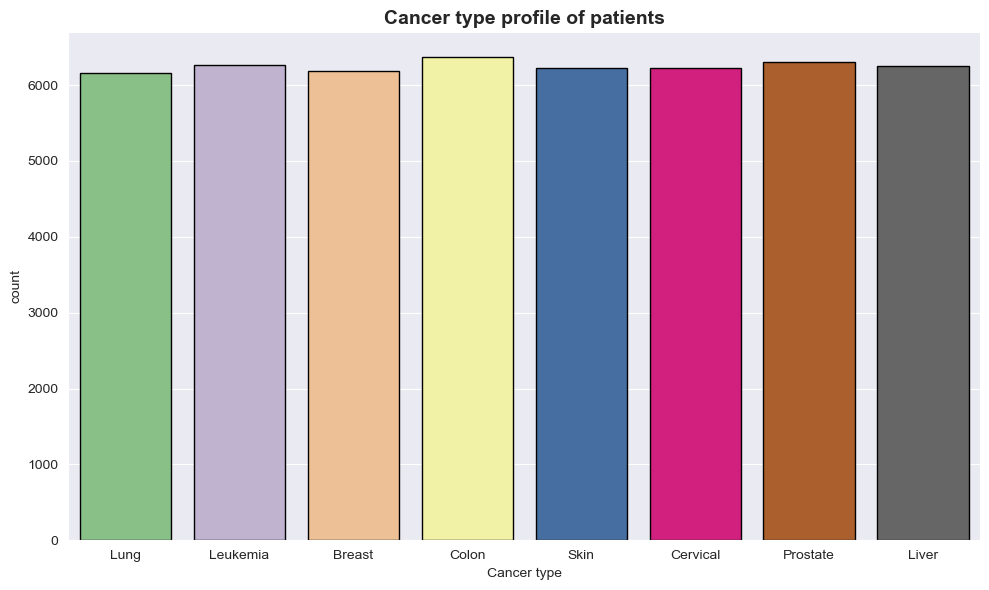

CPU times: total: 391 ms
Wall time: 388 ms


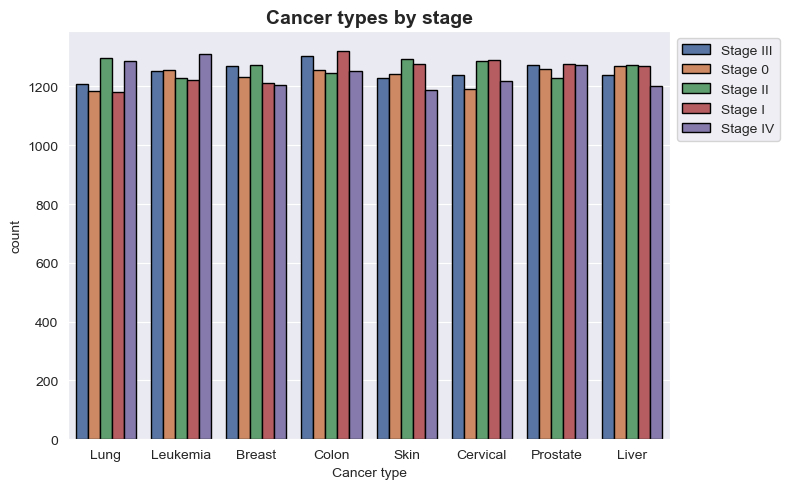

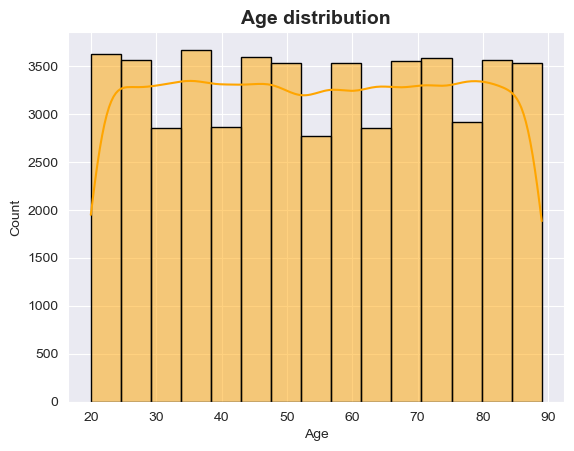

CPU times: total: 359 ms
Wall time: 378 ms


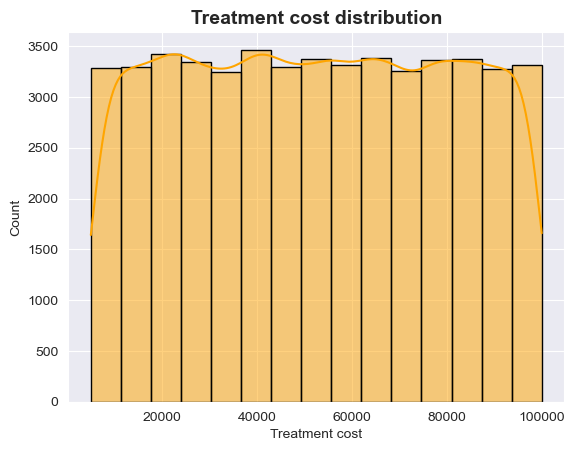

CPU times: total: 438 ms
Wall time: 440 ms


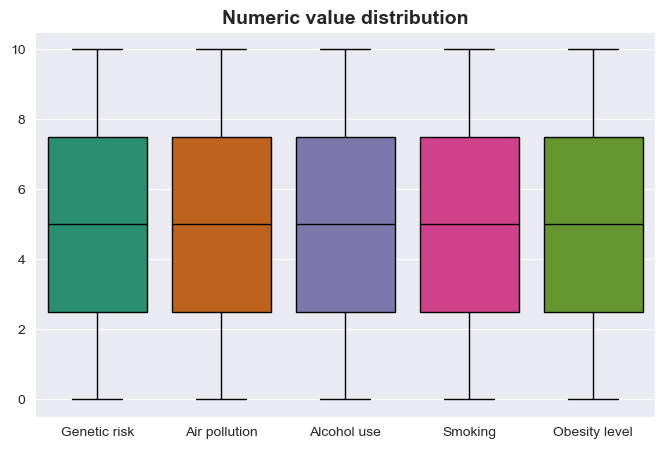

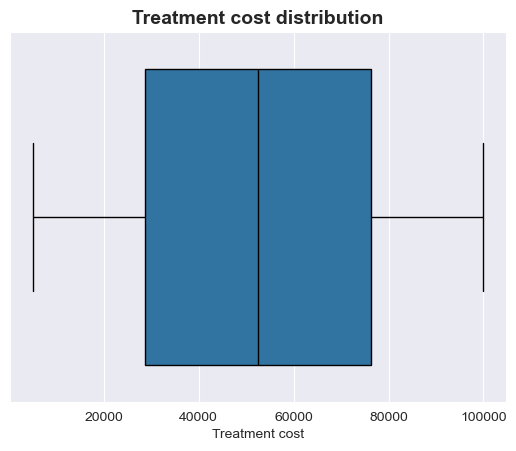

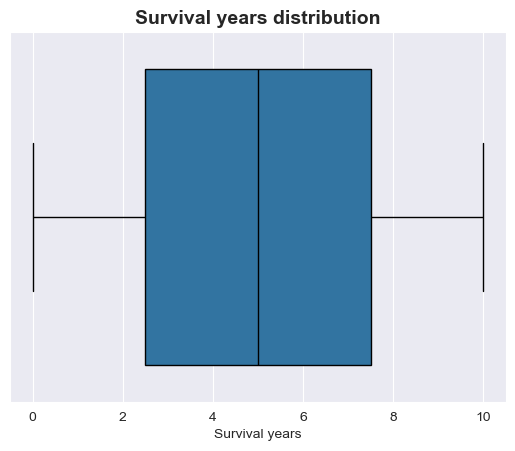

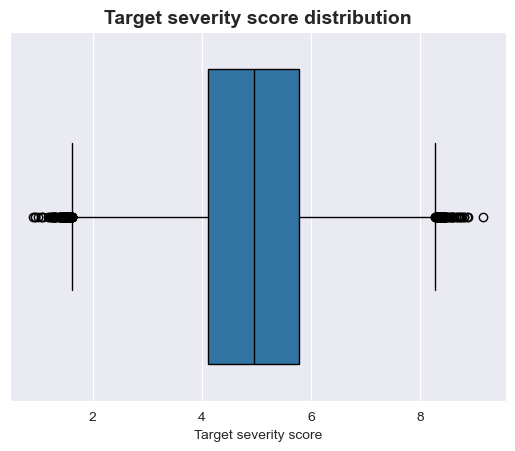

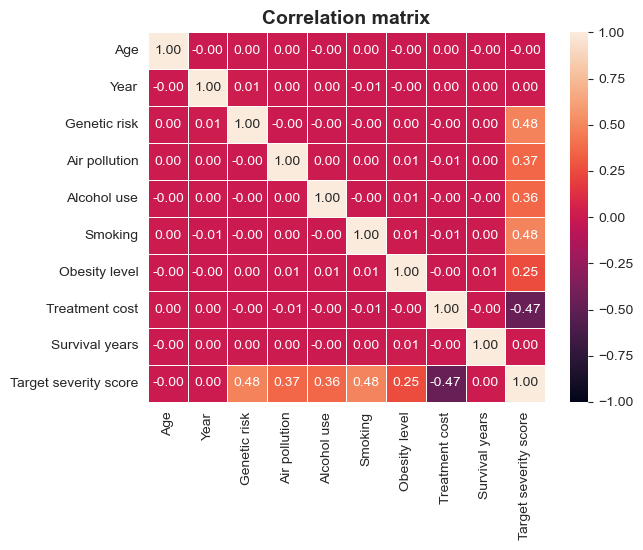

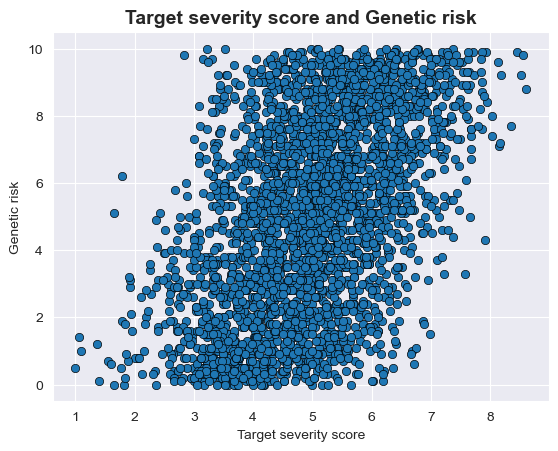

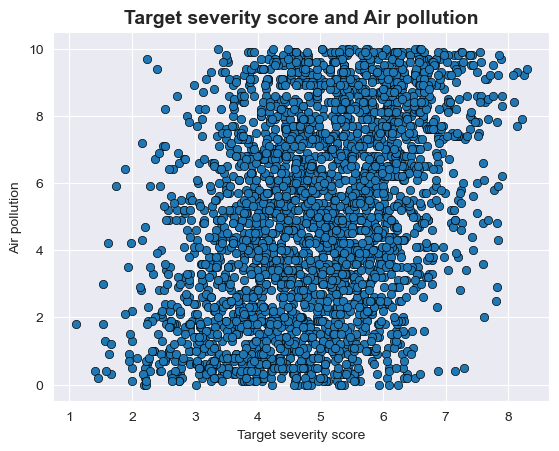

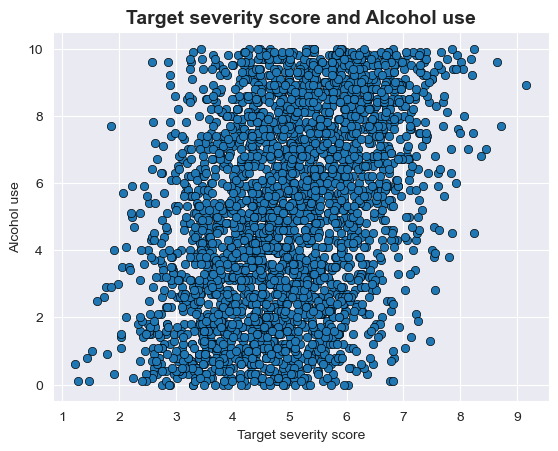

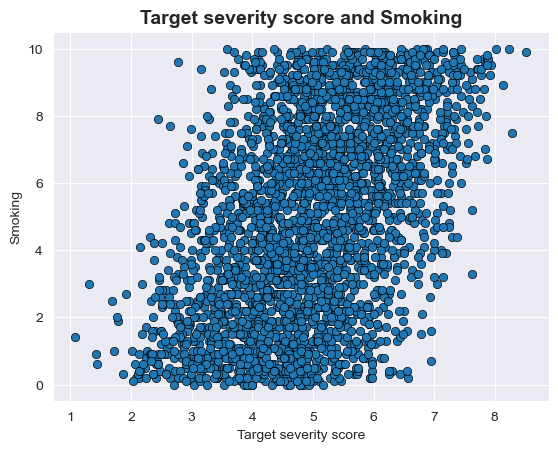

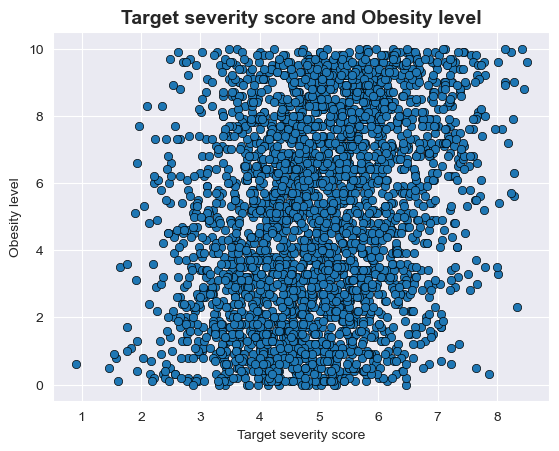

In [1]:
%run Cancer_EDA.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

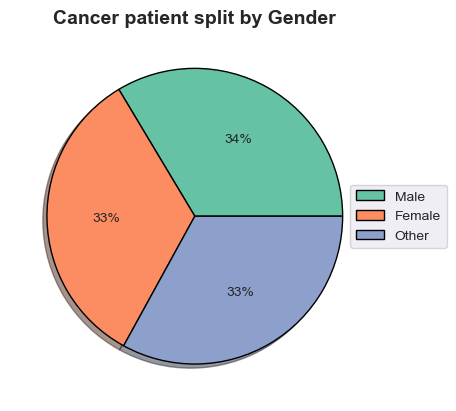

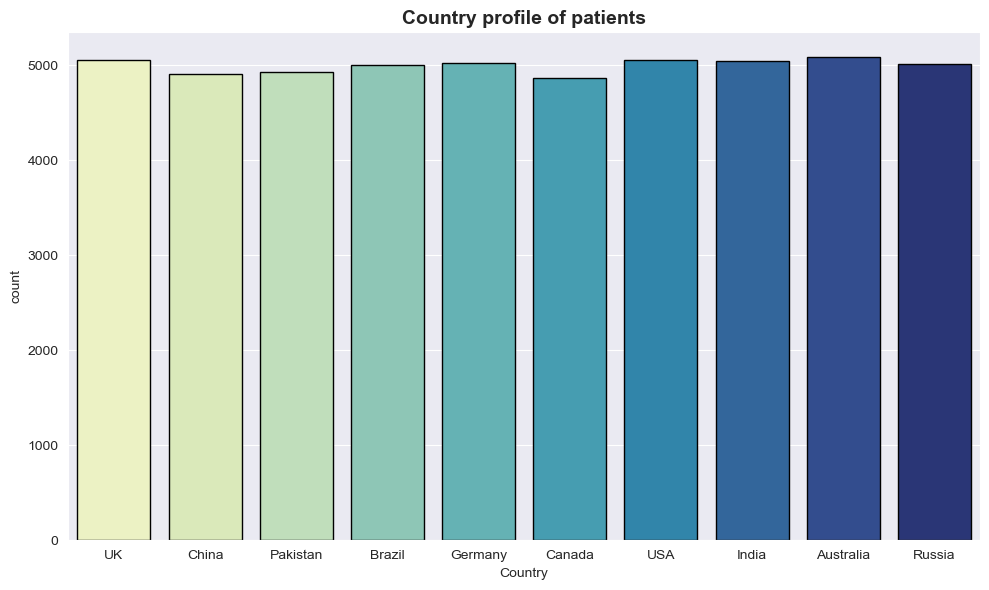

CPU times: total: 828 ms
Wall time: 860 ms


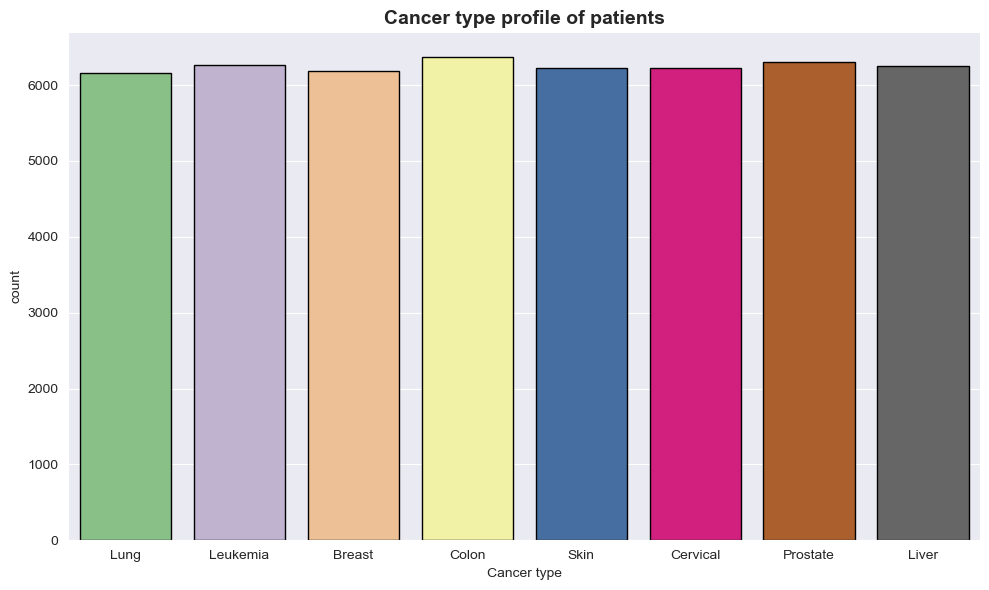

CPU times: total: 672 ms
Wall time: 719 ms


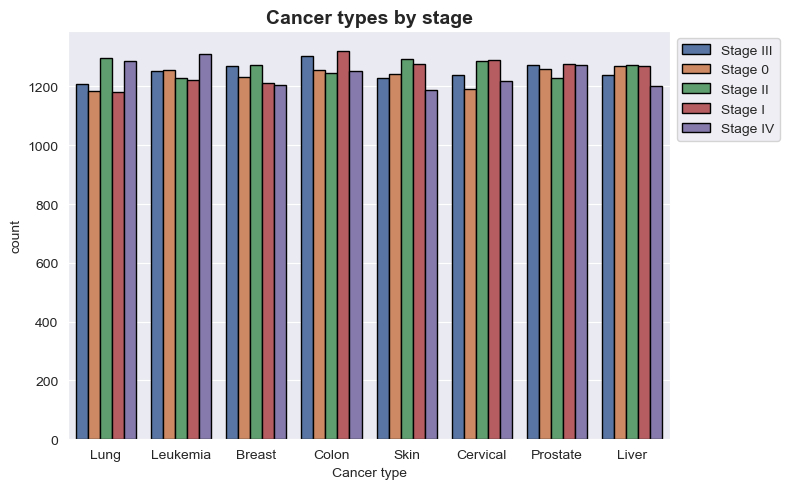

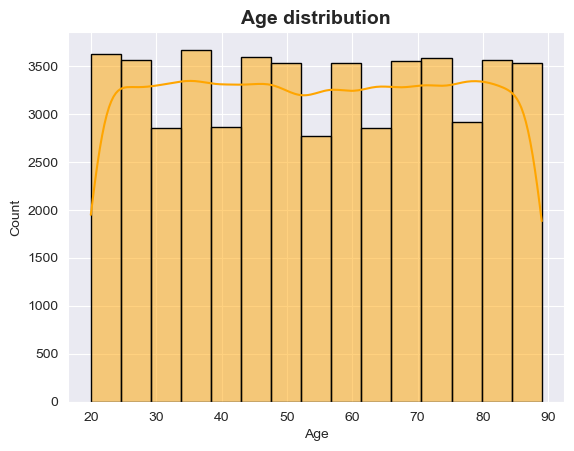

CPU times: total: 391 ms
Wall time: 386 ms


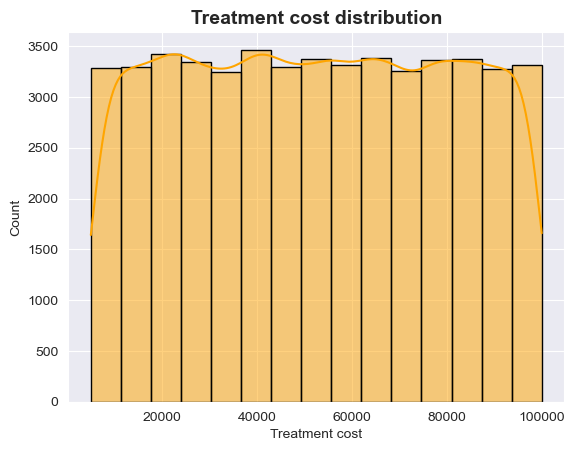

CPU times: total: 375 ms
Wall time: 378 ms


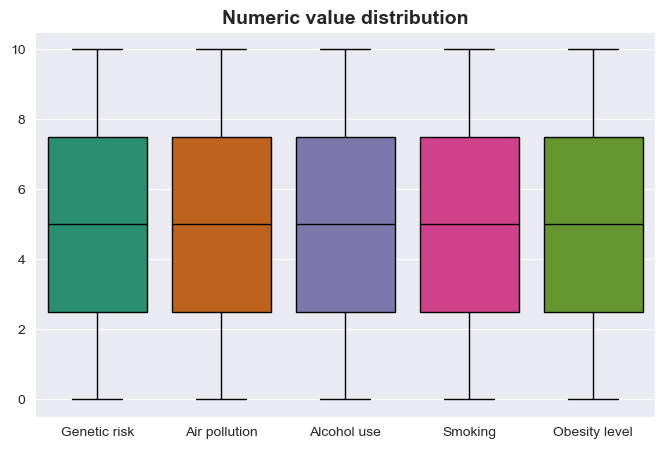

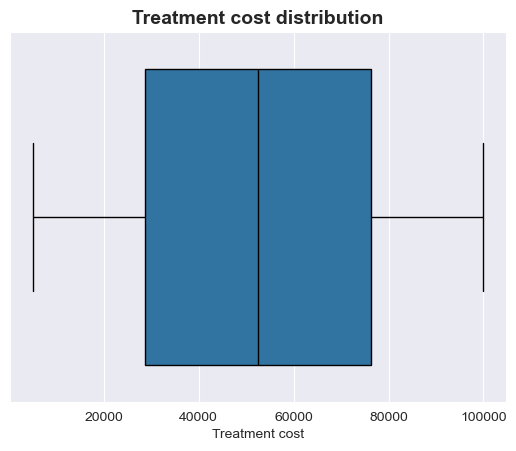

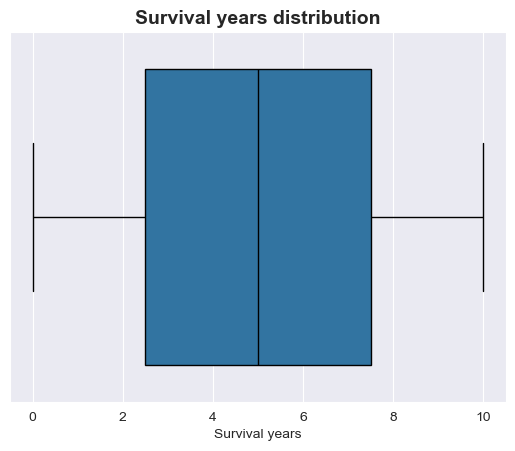

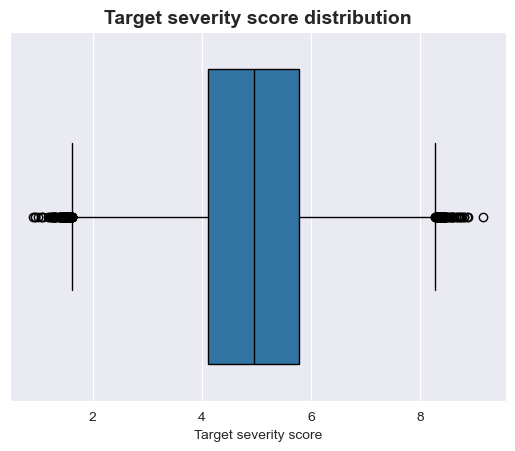

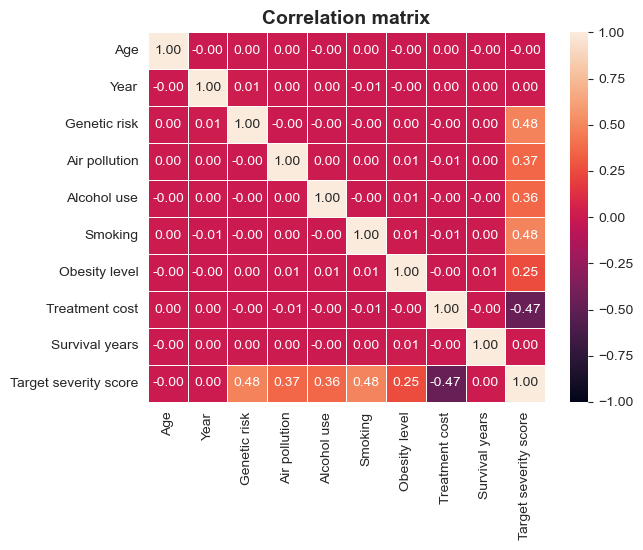

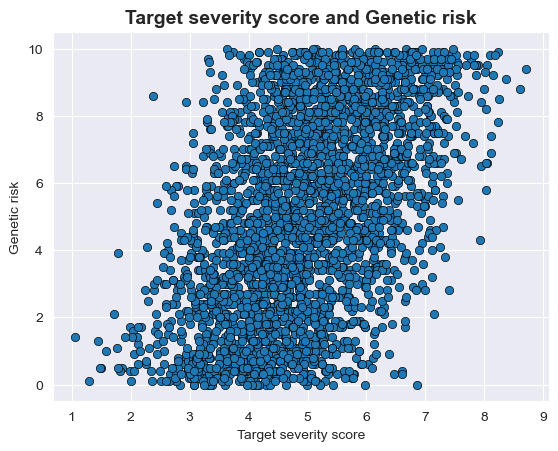

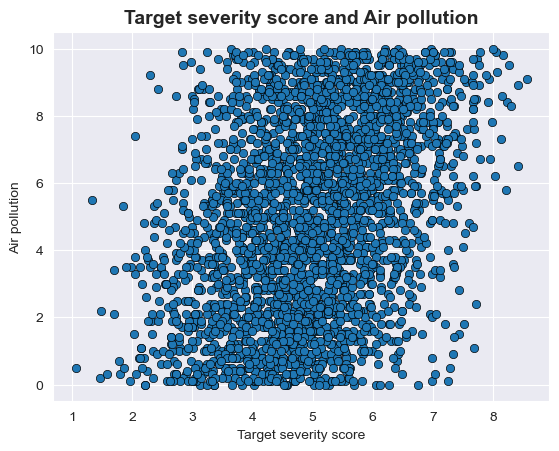

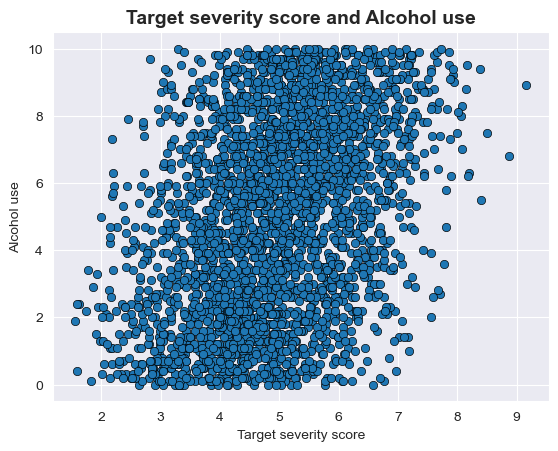

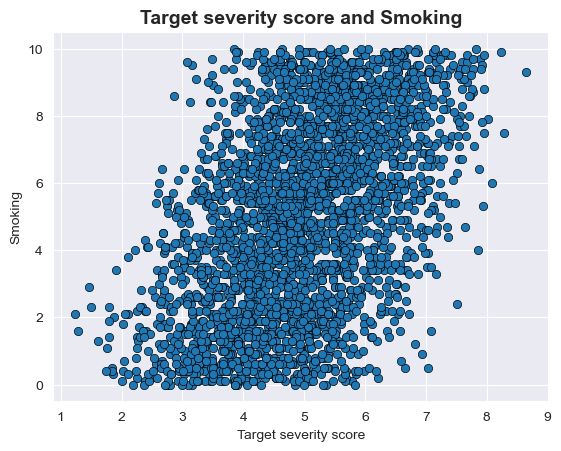

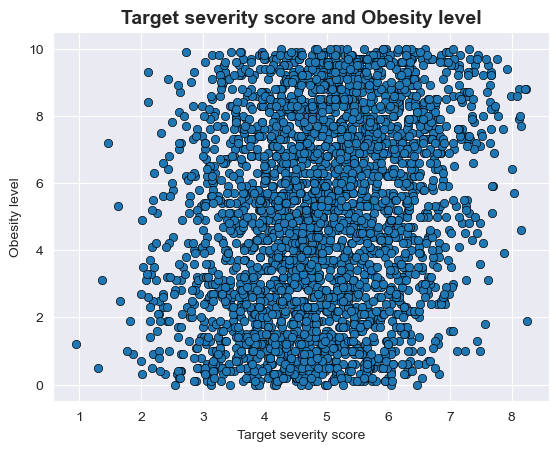

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, PT0000000 to PT0049999
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    50000 non-null  int64  
 1   Genetic risk           50000 non-null  float64
 2   Air pollution          50000 non-null  float64
 3   Alcohol use            50000 non-null  float64
 4   Smoking                50000 non-null  float64
 5   Obesity level          50000 non-null  float64
 6   Treatment cost         50000 non-null  float64
 7   Survival years         50000 non-null  float64
 8   Target severity score  50000 non-null  float64
 9   Gender_Female          50000 non-null  float64
 10  Gender_Male            50000 non-null  float64
 11  Gender_Other           50000 non-null  float64
 12  Country_Australia      50000 non-null  float64
 13  Country_Brazil         50000 non-null  float64
 14  Country_Canada         50000 non-null  float64


In [2]:
%run Cancer_prep.ipynb

## Import libraries

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance

In [4]:
df_2.columns

Index(['Age', 'Genetic risk', 'Air pollution', 'Alcohol use', 'Smoking',
       'Obesity level', 'Treatment cost', 'Survival years',
       'Target severity score', 'Gender_Female', 'Gender_Male', 'Gender_Other',
       'Country_Australia', 'Country_Brazil', 'Country_Canada',
       'Country_China', 'Country_Germany', 'Country_India', 'Country_Pakistan',
       'Country_Russia', 'Country_UK', 'Country_USA', 'Cancer type_Breast',
       'Cancer type_Cervical', 'Cancer type_Colon', 'Cancer type_Leukemia',
       'Cancer type_Liver', 'Cancer type_Lung', 'Cancer type_Prostate',
       'Cancer type_Skin', 'Cancer stage'],
      dtype='object')

In [5]:
# Drop patient ID index. No longer needed.
df_2.reset_index(drop = True, inplace = True)
df_2.head()

,Age,Genetic risk,Air pollution,Alcohol use,Smoking,Obesity level,Treatment cost,Survival years,Target severity score,Gender_Female,...,Country_USA,Cancer type_Breast,Cancer type_Cervical,Cancer type_Colon,Cancer type_Leukemia,Cancer type_Liver,Cancer type_Lung,Cancer type_Prostate,Cancer type_Skin,Cancer stage
0,71,6.4,2.8,9.5,0.9,8.7,62913.44,5.9,4.92,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
1,34,1.3,4.5,3.7,3.9,6.3,12573.41,4.7,4.65,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,80,7.4,7.9,2.4,4.7,0.1,6984.33,7.1,5.84,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,40,1.7,2.9,4.8,3.5,2.7,67446.25,1.6,3.12,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,43,5.1,2.8,2.3,6.7,0.5,77977.12,2.9,3.62,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0


## 1. Train test split

In [6]:
# Declare X and y variables
X = df_2.drop(['Target severity score', 'Treatment cost', 'Survival years'], axis = 1)
y = df_2['Target severity score']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

## 2. Scale features

In [8]:
# Scale predictor features for modelling. Only features that have not been encoded.
standard = ['Age', 
            'Genetic risk', 
            'Air pollution', 
            'Alcohol use',
            'Smoking',
            'Obesity level',]

# Scale predicting features using standard scaler. 
scaler = StandardScaler()

# Scale X training set
X_train_scaled = X_train.copy()
X_train_scaled[standard] = scaler.fit_transform(X_train_scaled[standard])
print(f'X_train scaled shape {X_train_scaled.shape}')

# Scale X test set
X_test_scaled = X_test.copy()
X_test_scaled[standard] = scaler.transform(X_test_scaled[standard])
print(f'X_test scaled shape {X_test_scaled.shape}')

X_train scaled shape (35000, 28)
X_test scaled shape (15000, 28)


In [9]:
X_train_scaled.head()

,Age,Genetic risk,Air pollution,Alcohol use,Smoking,Obesity level,Gender_Female,Gender_Male,Gender_Other,Country_Australia,...,Country_USA,Cancer type_Breast,Cancer type_Cervical,Cancer type_Colon,Cancer type_Leukemia,Cancer type_Liver,Cancer type_Lung,Cancer type_Prostate,Cancer type_Skin,Cancer stage
38094,-0.265710,0.000731,-0.974892,0.686303,0.730488,1.627718,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
40624,1.068267,0.901298,1.243978,-1.421713,1.008135,0.625539,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
49425,0.870641,-1.592580,0.966619,-0.350426,0.244607,0.418192,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
35734,0.623608,1.524768,-0.038806,-1.490829,-0.935392,0.383634,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
41708,-0.710369,0.728112,-0.628194,1.170110,1.355193,-0.031061,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [10]:
X_test_scaled.head()

,Age,Genetic risk,Air pollution,Alcohol use,Smoking,Obesity level,Gender_Female,Gender_Male,Gender_Other,Country_Australia,...,Country_USA,Cancer type_Breast,Cancer type_Cervical,Cancer type_Colon,Cancer type_Leukemia,Cancer type_Liver,Cancer type_Lung,Cancer type_Prostate,Cancer type_Skin,Cancer stage
33553,0.425982,1.213033,-1.460270,0.893649,1.181664,0.660097,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9427,0.475388,0.624201,-1.078902,-0.661445,-0.900686,0.487308,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
199,1.216486,1.524768,-0.004137,-0.039408,1.181664,-0.791334,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
12447,0.080136,0.312466,0.862610,0.513515,-1.560097,0.867444,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
39489,-0.660962,-0.345641,-0.212156,-0.557772,1.008135,0.902002,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [11]:
# Scale target variable using Robust scaler
transformer = RobustScaler()

# Scale X training set
y_train_scaled = y_train.copy()
y_train_scaled = transformer.fit_transform(y_train_scaled.values.reshape(-1, 1))
print(f'y_train shape {y_train_scaled.shape}')

# Scale X test set
y_test_scaled = y_test.copy()
y_test_scaled = transformer.transform(y_test_scaled.values.reshape(-1, 1))
print(f'y_test shape {y_test.shape}')

y_train shape (35000, 1)
y_test shape (15000,)


## 3. Functions list

In [12]:
# Create hyperparameter tuning function
def model_select(model, params):
    grid = RandomizedSearchCV(model, params, scoring = 'r2', cv = 5)
    grid.fit(X_train_scaled, y_train_scaled)
    return grid.best_estimator_

In [13]:
# Create metrics function
def metrics(test, prediction):
    mae = mean_absolute_error(test, prediction)
    mse = mean_squared_error(test, prediction)
    r2 = r2_score(test, prediction)
    print(f'Mean absolute error {mae:.5f}')
    print(f'Mean squared error {mse:.5f}')
    print(f'r2 score {r2:.5f}')

In [14]:
# Create function for inverse transform
def inverse(predict, test):
    pred_original = transformer.inverse_transform(predict.reshape(-1, 1))
    test_original = transformer.inverse_transform(test.reshape(-1, 1))
    return pred_original, test_original

In [15]:
# Create function for cross validation score
def score_validation(estimator):
    cv_scores = cross_val_score(
        estimator, 
        X_train_scaled,
        y_train_scaled.ravel(),
        cv = 5,
        scoring = 'r2'
    )
    print('CV r2 Score:', cv_scores.round(3))
    print('CV mean r2:', round(cv_scores.mean(), 5))

In [16]:
# Create residuals function
def residual(test, prediction):
    residuals = test.flatten() - prediction.flatten()
    sns.scatterplot(x = prediction.flatten(), y = residuals, edgecolor = 'black')
    plt.axhline(0, color = 'red', linestyle= '--', linewidth = 1)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.tight_layout()
    plt.show()

In [17]:
# Create actual vs prediction plot
def actual_vs_pred(test, prediction):
    sns.scatterplot(x = test.flatten(), y = prediction.flatten(), edgecolor = 'black', color = 'orange')
    plt.plot(
        [test.min(), test.max()],
        [test.min(), test.max()],
        color = 'red', linestyle = '--', linewidth = 1
    )
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.tight_layout()
    plt.show()

## 5. Model One - Ridge Regression

In [18]:
# Fit training dataset and predict - Ridge
ridge_list = {
    'alpha': [1.0, 10.0, 50.0, 100.0],
    'max_iter': [1000, 5000, 10000],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
}

ridge = model_select(Ridge(random_state = 42), ridge_list)
print(ridge)
ridge_fit = ridge.fit(X_train_scaled, y_train_scaled)
ridge_pred = ridge.predict(X_test_scaled)

Ridge(alpha=50.0, max_iter=1000, random_state=42, solver='sag')


In [19]:
%%time
ridge_pred_original, ridge_test_original = inverse(ridge_pred, y_test_scaled)

CPU times: total: 0 ns
Wall time: 1.54 ms


In [20]:
# Metrics for ridge model
metrics(ridge_test_original, ridge_pred_original)

Mean absolute error 0.47810
Mean squared error 0.30300
r2 score 0.78706


In [21]:
# Score validation for ridge model
score_validation(ridge)

CV r2 Score: [0.793 0.793 0.797 0.799 0.787]
CV mean r2: 0.79368


## 6. Model Two - SVR

In [22]:
# Fit training dataset and predict - SVR
svr_list = {
    'epsilon': [0.1, 1.0, 10.0, 100.0],
    'C': [1.0, 10.0, 50.0, 100.00],
    'gamma': ['scale', 'auto'],
    'max_iter': [1000, 5000, 10000]
}

svr = model_select(SVR(kernel = 'rbf'), svr_list)
print(svr)
svr_fit = svr.fit(X_train_scaled, y_train_scaled)
svr_pred = svr.predict(X_test_scaled)

SVR(C=10.0, epsilon=1.0, max_iter=10000)


In [23]:
%%time
svr_pred_original, svr_test_original = inverse(svr_pred, y_test_scaled)

CPU times: total: 0 ns
Wall time: 999 μs


In [24]:
# Metrics for SVR model
metrics(svr_test_original, svr_pred_original)

Mean absolute error 0.51313
Mean squared error 0.37115
r2 score 0.73916


In [25]:
# Score validation for svr model
score_validation(svr)

CV r2 Score: [0.744 0.735 0.74  0.747 0.733]
CV mean r2: 0.73988


## 7. Model Three - Decision Tree

In [26]:
# Fit training dataset and predict - Decision Tree
tree_list = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random']
}

tree = model_select(DecisionTreeRegressor(random_state = 42, max_depth = 10), tree_list)
print(tree)
tree_fit = tree.fit(X_train_scaled, y_train_scaled)
tree_pred = tree.predict(X_test_scaled)

DecisionTreeRegressor(max_depth=10, random_state=42)


In [27]:
%%time
tree_pred_original, tree_test_original = inverse(tree_pred, y_test_scaled)

CPU times: total: 0 ns
Wall time: 999 μs


In [28]:
# Metrics for tree model
metrics(tree_test_original, tree_pred_original)

Mean absolute error 0.54014
Mean squared error 0.42374
r2 score 0.70221


In [29]:
# Score validation for decision tree model
score_validation(tree)

CV r2 Score: [0.701 0.712 0.706 0.714 0.695]
CV mean r2: 0.70563


## 8. Feature evaluation

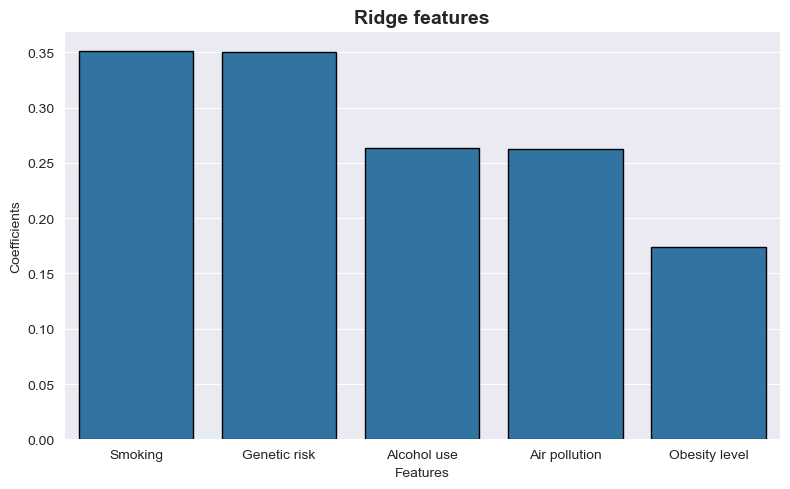

In [30]:
# Feature evaluation on Ridge model
coefficients = ridge.coef_.ravel()  


df_coef = pd.DataFrame({
    'Features': X_train.columns,
    'Coefficients': coefficients
})


df_coef = df_coef[np.abs(df_coef['Coefficients']) > 0]
df_coef = df_coef.sort_values(by = 'Coefficients', key = np.abs, ascending = False).reset_index(drop = True)

plt.figure(figsize = (8, 5))
sns.barplot(
    data = df_coef.head(5), 
    x = 'Features',
    y = 'Coefficients',
    edgecolor = 'black'
)

plt.title('Ridge features', fontsize = 14, fontweight = 'bold')
plt.tight_layout()
plt.savefig('Ridge.jpeg', bbox_inches = 'tight')
plt.show()

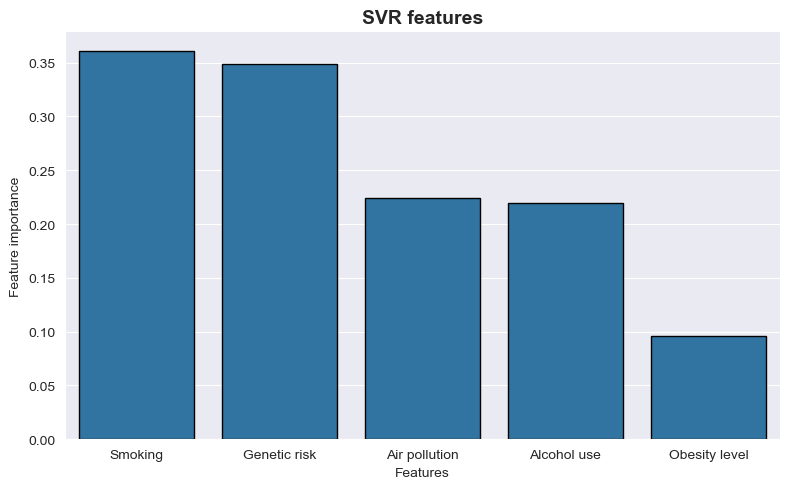

In [31]:
# Feature evaluation on SVR model
perm = permutation_importance(
    estimator = svr,
    X = X_test_scaled,
    y = y_test_scaled,
    scoring = 'r2',
    n_repeats = 5,
    random_state = 42
)

df_perm = pd.DataFrame({
    'Features': X_train.columns,
    'Feature importance': perm.importances_mean.round(3)
})

df_perm = df_perm.sort_values(by = 'Feature importance', ascending = False).reset_index(drop = True)
df_perm = df_perm[df_perm['Feature importance'] > 0.00]
df_perm

plt.figure(figsize = (8, 5))
sns.barplot(
    data = df_perm, 
    x = 'Features',
    y = 'Feature importance',
    edgecolor = 'black'
)

plt.title('SVR features', fontsize = 14, fontweight = 'bold')
plt.tight_layout()
plt.savefig('SVR', bbox_inches = 'tight')
plt.show()

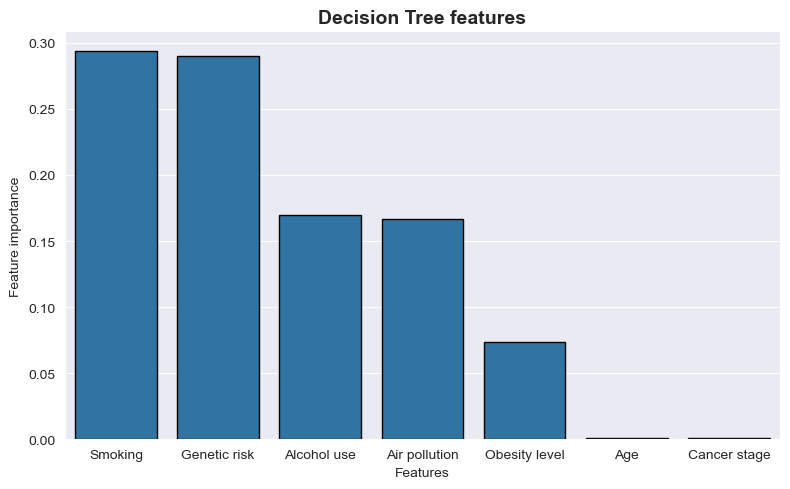

In [32]:
# Feature evalation on decision tree model
features = tree.feature_importances_
feature_names = X_train_scaled.columns

df_feature = pd.DataFrame({
    'Features' : feature_names,
    'Feature importance': features.round(3)
})

df_feature = df_feature.sort_values(by='Feature importance', ascending = False).reset_index(drop = True)
df_feature = df_feature[df_feature['Feature importance'] > 0]


plt.figure(figsize = (8, 5))
sns.barplot(
    data = df_feature, 
    x = 'Features',
    y = 'Feature importance',
    edgecolor = 'black'
)

plt.title('Decision Tree features', fontsize = 14, fontweight = 'bold')
plt.tight_layout()
plt.savefig('Tree.jpeg')
plt.show()

## 9. Residuals plot

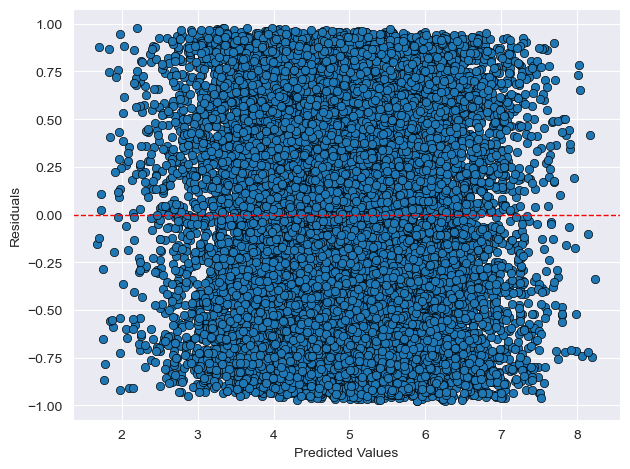

In [33]:
# Residual plot - Ridge regression
residual(ridge_test_original, ridge_pred_original)

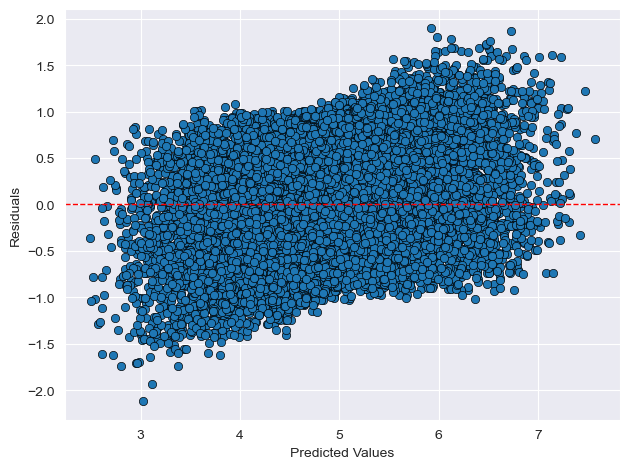

In [34]:
# Residual plot - SVR
residual(svr_test_original, svr_pred_original)

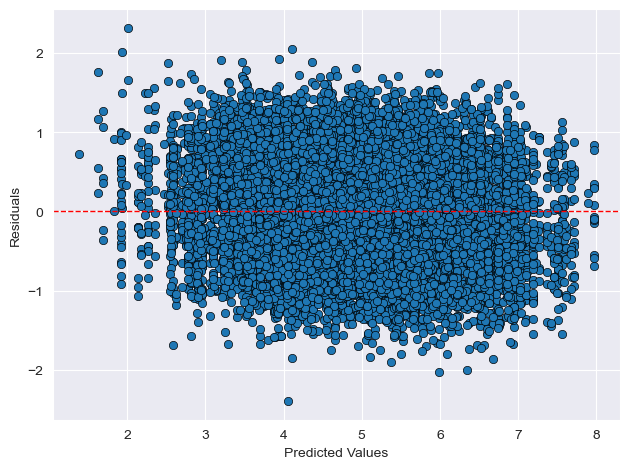

In [35]:
# Residual plot - Decision Tree
residual(tree_test_original, tree_pred_original)

## 10. Actual vs predicted

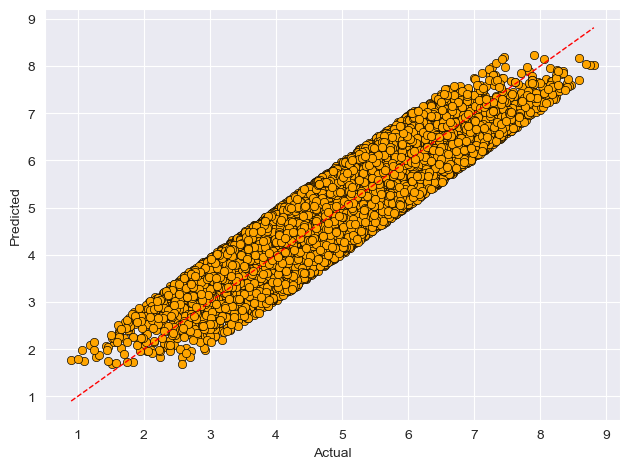

In [36]:
# Actual vs predicted - Ridge
actual_vs_pred(ridge_test_original, ridge_pred_original)

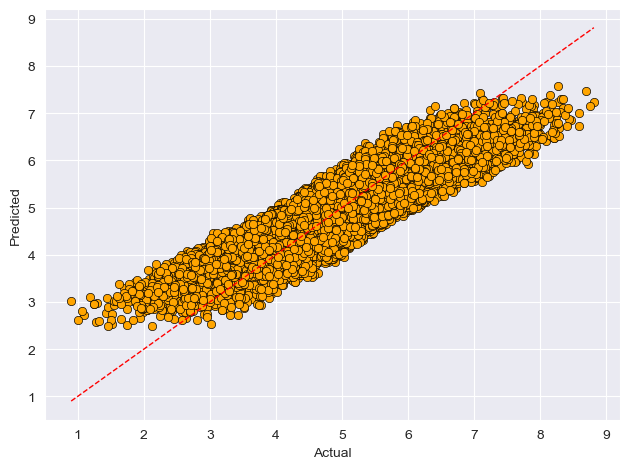

In [37]:
# Actual vs predicted - SVR
actual_vs_pred(svr_test_original, svr_pred_original)

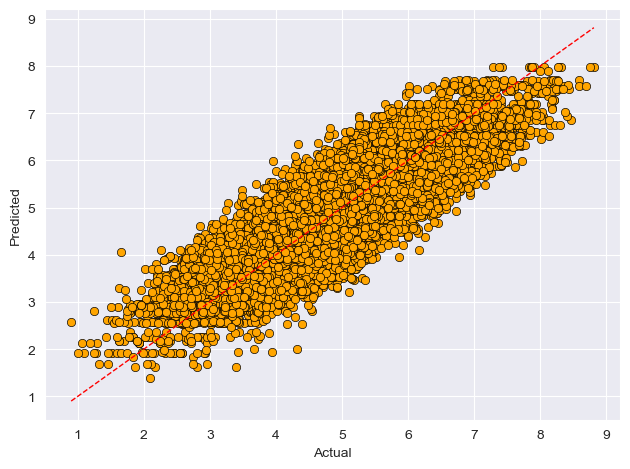

In [38]:
# Actual vs predicted - Decision tree
actual_vs_pred(tree_test_original, tree_pred_original)